# Imports and Data

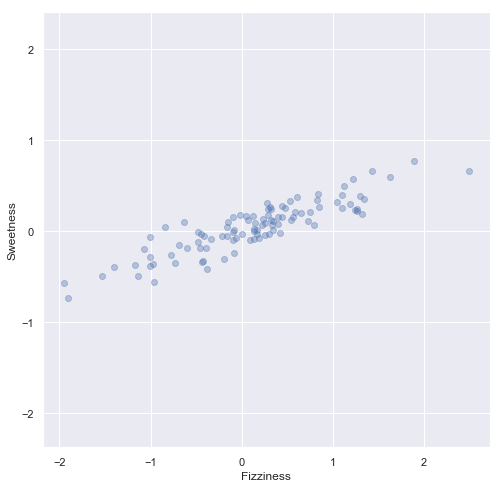

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 100)).T
plt.figure(figsize = (8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha = 0.35)
plt.xlabel("Fizziness")
plt.ylabel("Sweetness")
plt.axis("equal");

In [4]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]
[0.71323427 0.01483411]


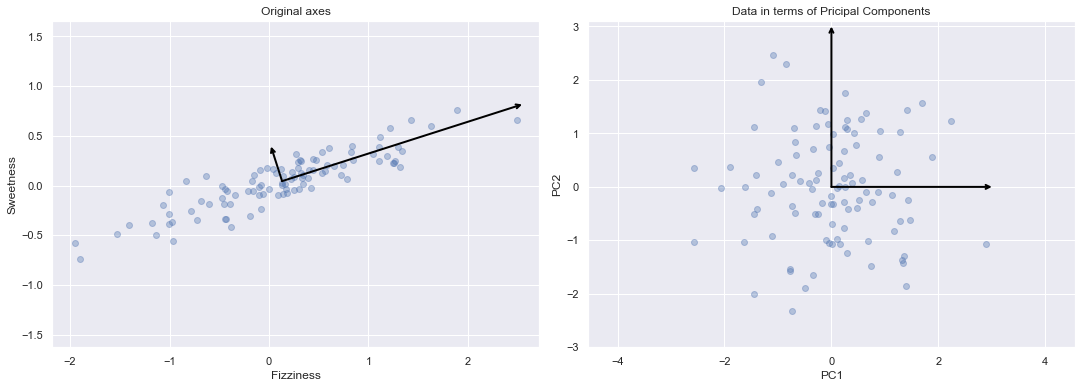

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle = '->',
                    linewidth = 2,
                    shrinkA = 0, 
                    shrinkB = 0,
                    color = "black")
    ax.annotate('', v1, v0, arrowprops = arrowprops)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.35)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax = ax[0])
ax[0].axis('equal');
ax[0].set(xlabel = 'Fizziness', ylabel = 'Sweetness', title = 'Original axes')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha = 0.35)
draw_vector([0, 0], [0, 3], ax = ax[1])
draw_vector([0, 0], [3, 0], ax = ax[1])
ax[1].axis('equal')
ax[1].set(xlabel = 'PC1', ylabel = 'PC2',
          title='Data in terms of Pricipal Components',
          xlim=(-5, 5), ylim=(-3, 3.1));

# PCA to reduce dimensions

In [6]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:    {}".format(X.shape))
print("transformed shape: {}".format(X_pca.shape))

original shape:    (100, 2)
transformed shape: (100, 1)


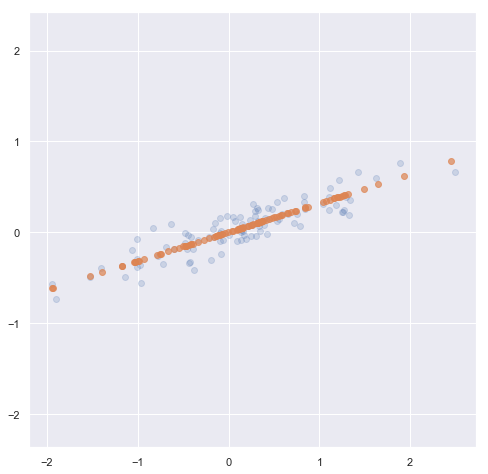

In [5]:
X_new = pca.inverse_transform(X_pca)

plt.figure(figsize = (8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.7)
plt.axis('equal');